In [1]:
import numpy as np
import scipy.ndimage.morphology as scm
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os

os.chdir("/Users/coulaud/Documents/DL-normalization")
dst_map = np.load("data/sign_dist_map.npz")['arr_0']

In [2]:
def plots(eps, dst_map):
    dists = np.unique(dst_map[dst_map>0])
    res_mean = np.empty((dists.shape[0],1))
    res_max = np.empty((dists.shape[0],1))
    res_min = np.empty((dists.shape[0],1))
    res_std = np.empty((dists.shape[0],1))

    for i,dist in enumerate(dists):
        mean = np.ones(eps.shape[0])
        max_ = np.ones(eps.shape[0])
        min_ = np.ones(eps.shape[0])
        std_ = np.ones(eps.shape[0])

        for j in range(eps.shape[0]):
            mask = np.where(dst_map[31:-31,28:-28]!=dist,True,False)
            mean[j] = np.ma.masked_array(eps[j,:,:], mask).mean()
            max_[j] = np.ma.masked_array(eps[j,:,:], mask).max()
            min_[j] = np.ma.masked_array(eps[j,:,:], mask).min()
            std_[j] = np.ma.masked_array(eps[j,:,:], mask).std()

        res_mean[i] = np.mean(mean)
        res_max[i] = np.mean(max_)
        res_min[i] = np.mean(min_)
        res_std[i] = np.mean(std_)



    return dists, res_mean[:,0], res_max[:,0], res_min[:,0],res_std[:,0]

In [15]:
dists, res_mean_newdata, res_max_newdata, res_min_newdata,res_std_newdata = plots(np.load("notebooks/newdata/eps10_skipco_ELU.npz")['arr_0'], dst_map)

In [16]:
dists, res_mean_16l, res_max_16l, res_min_16l, res_std_16l = plots(np.load("notebooks/newdata/eps10_eps_skipco_ELU_16l.npz")['arr_0'], dst_map)

In [17]:
#dists, res_mean_sc, res_max_sc, res_min_sc = plots(np.load("notebooks/final/comparison/eps10_skip_co_elu.npz")['arr_0'], dst_map)

In [18]:
import os
import subprocess
import matplotlib.font_manager as font_manager

kpse_cp = subprocess.run(
    ['kpsewhich', '-var-value', 'TEXMFDIST'], capture_output=True, check=True)
font_loc1 = os.path.join(kpse_cp.stdout.decode(
    'utf8').strip(), 'fonts', 'opentype', 'public', 'tex-gyre')
print(f'loading TeX Gyre fonts from "{font_loc1}"')
font_dirs = [font_loc1]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'TeX Gyre Termes'
plt.rcParams["mathtext.fontset"] = "stix"

loading TeX Gyre fonts from "/usr/local/texlive/2022/texmf-dist/fonts/opentype/public/tex-gyre"


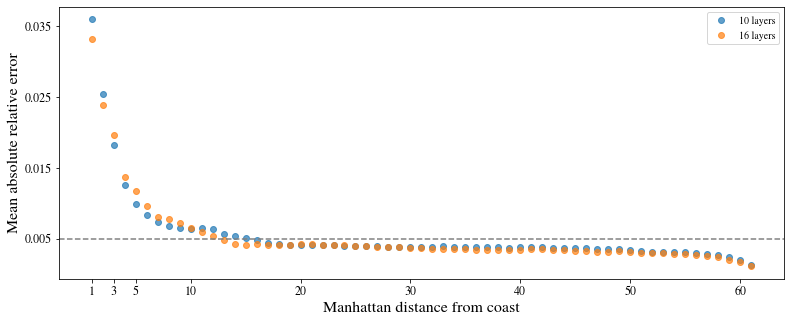

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
fig, ax = plt.subplots(figsize=(13,5))

plt.plot(dists,np.maximum(res_max_newdata, np.abs(res_min_newdata)),'o',alpha=0.7  )
plt.plot(dists,np.maximum(res_max_16l, np.abs(res_min_16l)),'o',alpha=0.7  )
plt.legend(["10 layers","16 layers"])
#plt.grid()
plt.ylabel("Mean absolute relative error", fontsize=16)
plt.xlabel("Manhattan distance from coast", fontsize=16)
ax.axhline(0.005, color="grey", ls="--")

plt.xticks([1,3,5,10,20,30,40,50,60], fontsize=12)
plt.yticks([0.005,0.015,0.025,0.035], fontsize=12)
plt.show()
fig.savefig("../../Desktop/error_coasts_10vs16.eps", format="eps",bbox_inches='tight')

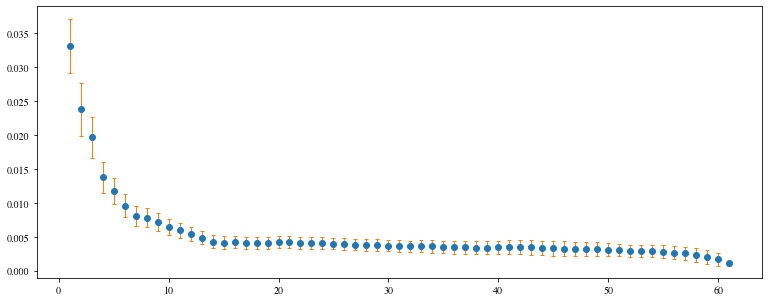

In [20]:
fig, ax = plt.subplots(figsize=(13,5))
plt.errorbar(dists,np.maximum(res_max_16l, np.abs(res_min_16l)), res_std_16l, fmt = 'o',color = '#1f77b4', 
            ecolor = '#ff7f0e', elinewidth = 1, capsize=2)
plt.show()

In [3]:
dists, res_mean_v1, res_max_v1, res_min_v1, res_std_v1 = plots(np.load("notebooks/newdata/eps10_eps_skipco_ELU.npz")['arr_0'], dst_map)
dists, res_mean_16, res_max_16, res_min_16, res_std_16 = plots(np.load("notebooks/newdata/eps10_eps_skipco_ELU_16l.npz")['arr_0'], dst_map)
dists, res_mean_v2, res_max_v2, res_min_v2, res_std_v2 = plots(np.load("notebooks/newdata/eps10_eps_skipco_v2.npz")['arr_0'], dst_map)


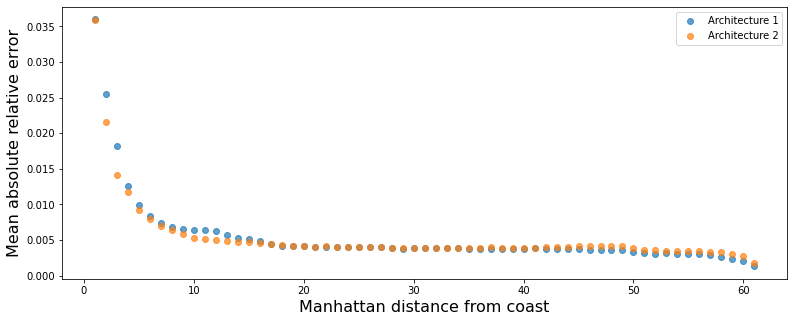

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
fig, ax = plt.subplots(figsize=(13,5))

plt.plot(dists,np.maximum(res_max_v1, np.abs(res_min_v1)),'o',alpha=0.7  )
plt.plot(dists,np.maximum(res_max_v2, np.abs(res_min_v2)),'o',alpha=0.7  )

plt.legend(["Architecture 1","Architecture 2"])
plt.ylabel("Mean absolute relative error", fontsize=16)
plt.xlabel("Manhattan distance from coast", fontsize=16)
#plt.xticks([1,3,5,10,20,30,34,40,50,60], fontsize=12)
#plt.yticks([0.005,0.015,0.025,0.035,0.2,0.4], fontsize=12)
plt.show()
fig.savefig("../../Desktop/error_coasts_v1vsv2.eps", format="eps",bbox_inches='tight')

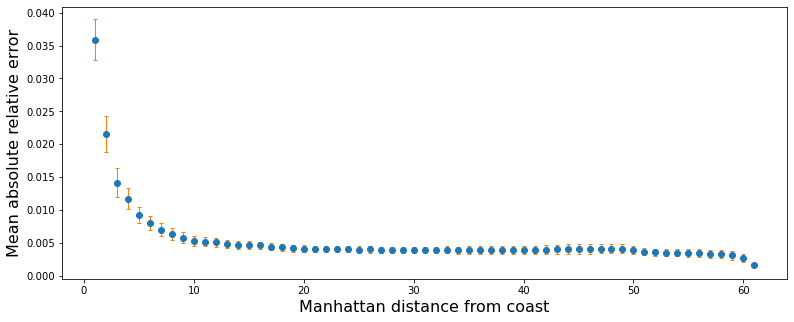

In [6]:
fig, ax = plt.subplots(figsize=(13,5))
plt.errorbar(dists,np.maximum(res_max_v2, np.abs(res_min_v2)), res_std_v2, fmt = 'o',color = '#1f77b4', 
            ecolor = '#ff7f0e', elinewidth = 1, capsize=2)
plt.ylabel("Mean absolute relative error", fontsize=16)
plt.xlabel("Manhattan distance from coast", fontsize=16)
plt.show()
fig.savefig("../../Desktop/error_bar_v2.eps", format="eps",bbox_inches='tight')